In [1]:
import numpy as np
import sys
sys.path.append("../dsc/functions")
import simulate

In [2]:
n = 1000
sfix = 10

In [41]:
x = np.linspace(0, 1, n)
knots = np.linspace(0, 1, sfix + 2)[1:-1]
H, Hinv, Hscale, Hinvscale, y, ytest, ytrue, beta, snr = simulate.changepoint_from_btrue(x, sfix, 0.001, signal = "normal", seed = 100)

In [42]:
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

In [43]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# #ax1.scatter(x, y, s = 1, alpha = 0.1)
# ax1.plot(x, ytrue1, label = "Bspline")
# ax1.plot(x, ytrue2, label = "Fast")
# ax1.legend()
# plt.show()

In [44]:
from gradvi.optimize import moving_average as gvma
y_ma = gvma.moving_average(y)

In [45]:
degree = 0
Xinv = np.zeros((2, 2))
s2init = None
ncomp = 20
sparsity = 0.99
skbase = 2.0
scale_grid = True
scale_basis = False
standardize_basis = False

In [46]:
if scale_grid:
    skfactor = (degree + 1) * 20.0
else:
    skfactor = 1.0 

print (skfactor)

20.0


In [47]:
from gradvi.priors import Ash
def get_ash(k = 20, sparsity = 0.8, skbase = 2.0, skfactor = 1.0, is_scaled = False, **kwargs):
    wk = np.zeros(k)
    wk[0] = 1.0 / k if sparsity is None else sparsity
    wk[1:(k-1)] = np.repeat((1 - wk[0])/(k-1), (k - 2))
    wk[k-1] = 1 - np.sum(wk)
    sk = skfactor * np.abs(np.power(skbase, np.arange(k) / k) - 1)
    prior = Ash(sk, wk = wk, scaled = is_scaled)
    return prior

In [48]:
# initialization
prior_init = get_ash(k = ncomp, sparsity = sparsity, skbase = skbase, skfactor = skfactor)

In [49]:
from gradvi.inference import Trendfiltering

In [50]:
gv = Trendfiltering(maxiter = 2000)
gv.fit(y, degree, prior_init, y_init = y_ma, s2_init = s2init)

In [51]:
from gradvi.models import basis_matrix as gvbm
H = gvbm.trendfiltering(n, degree)
ypred = np.dot(H, gv.coef)

In [52]:
gv._tf_intercept

-0.08616158842660153

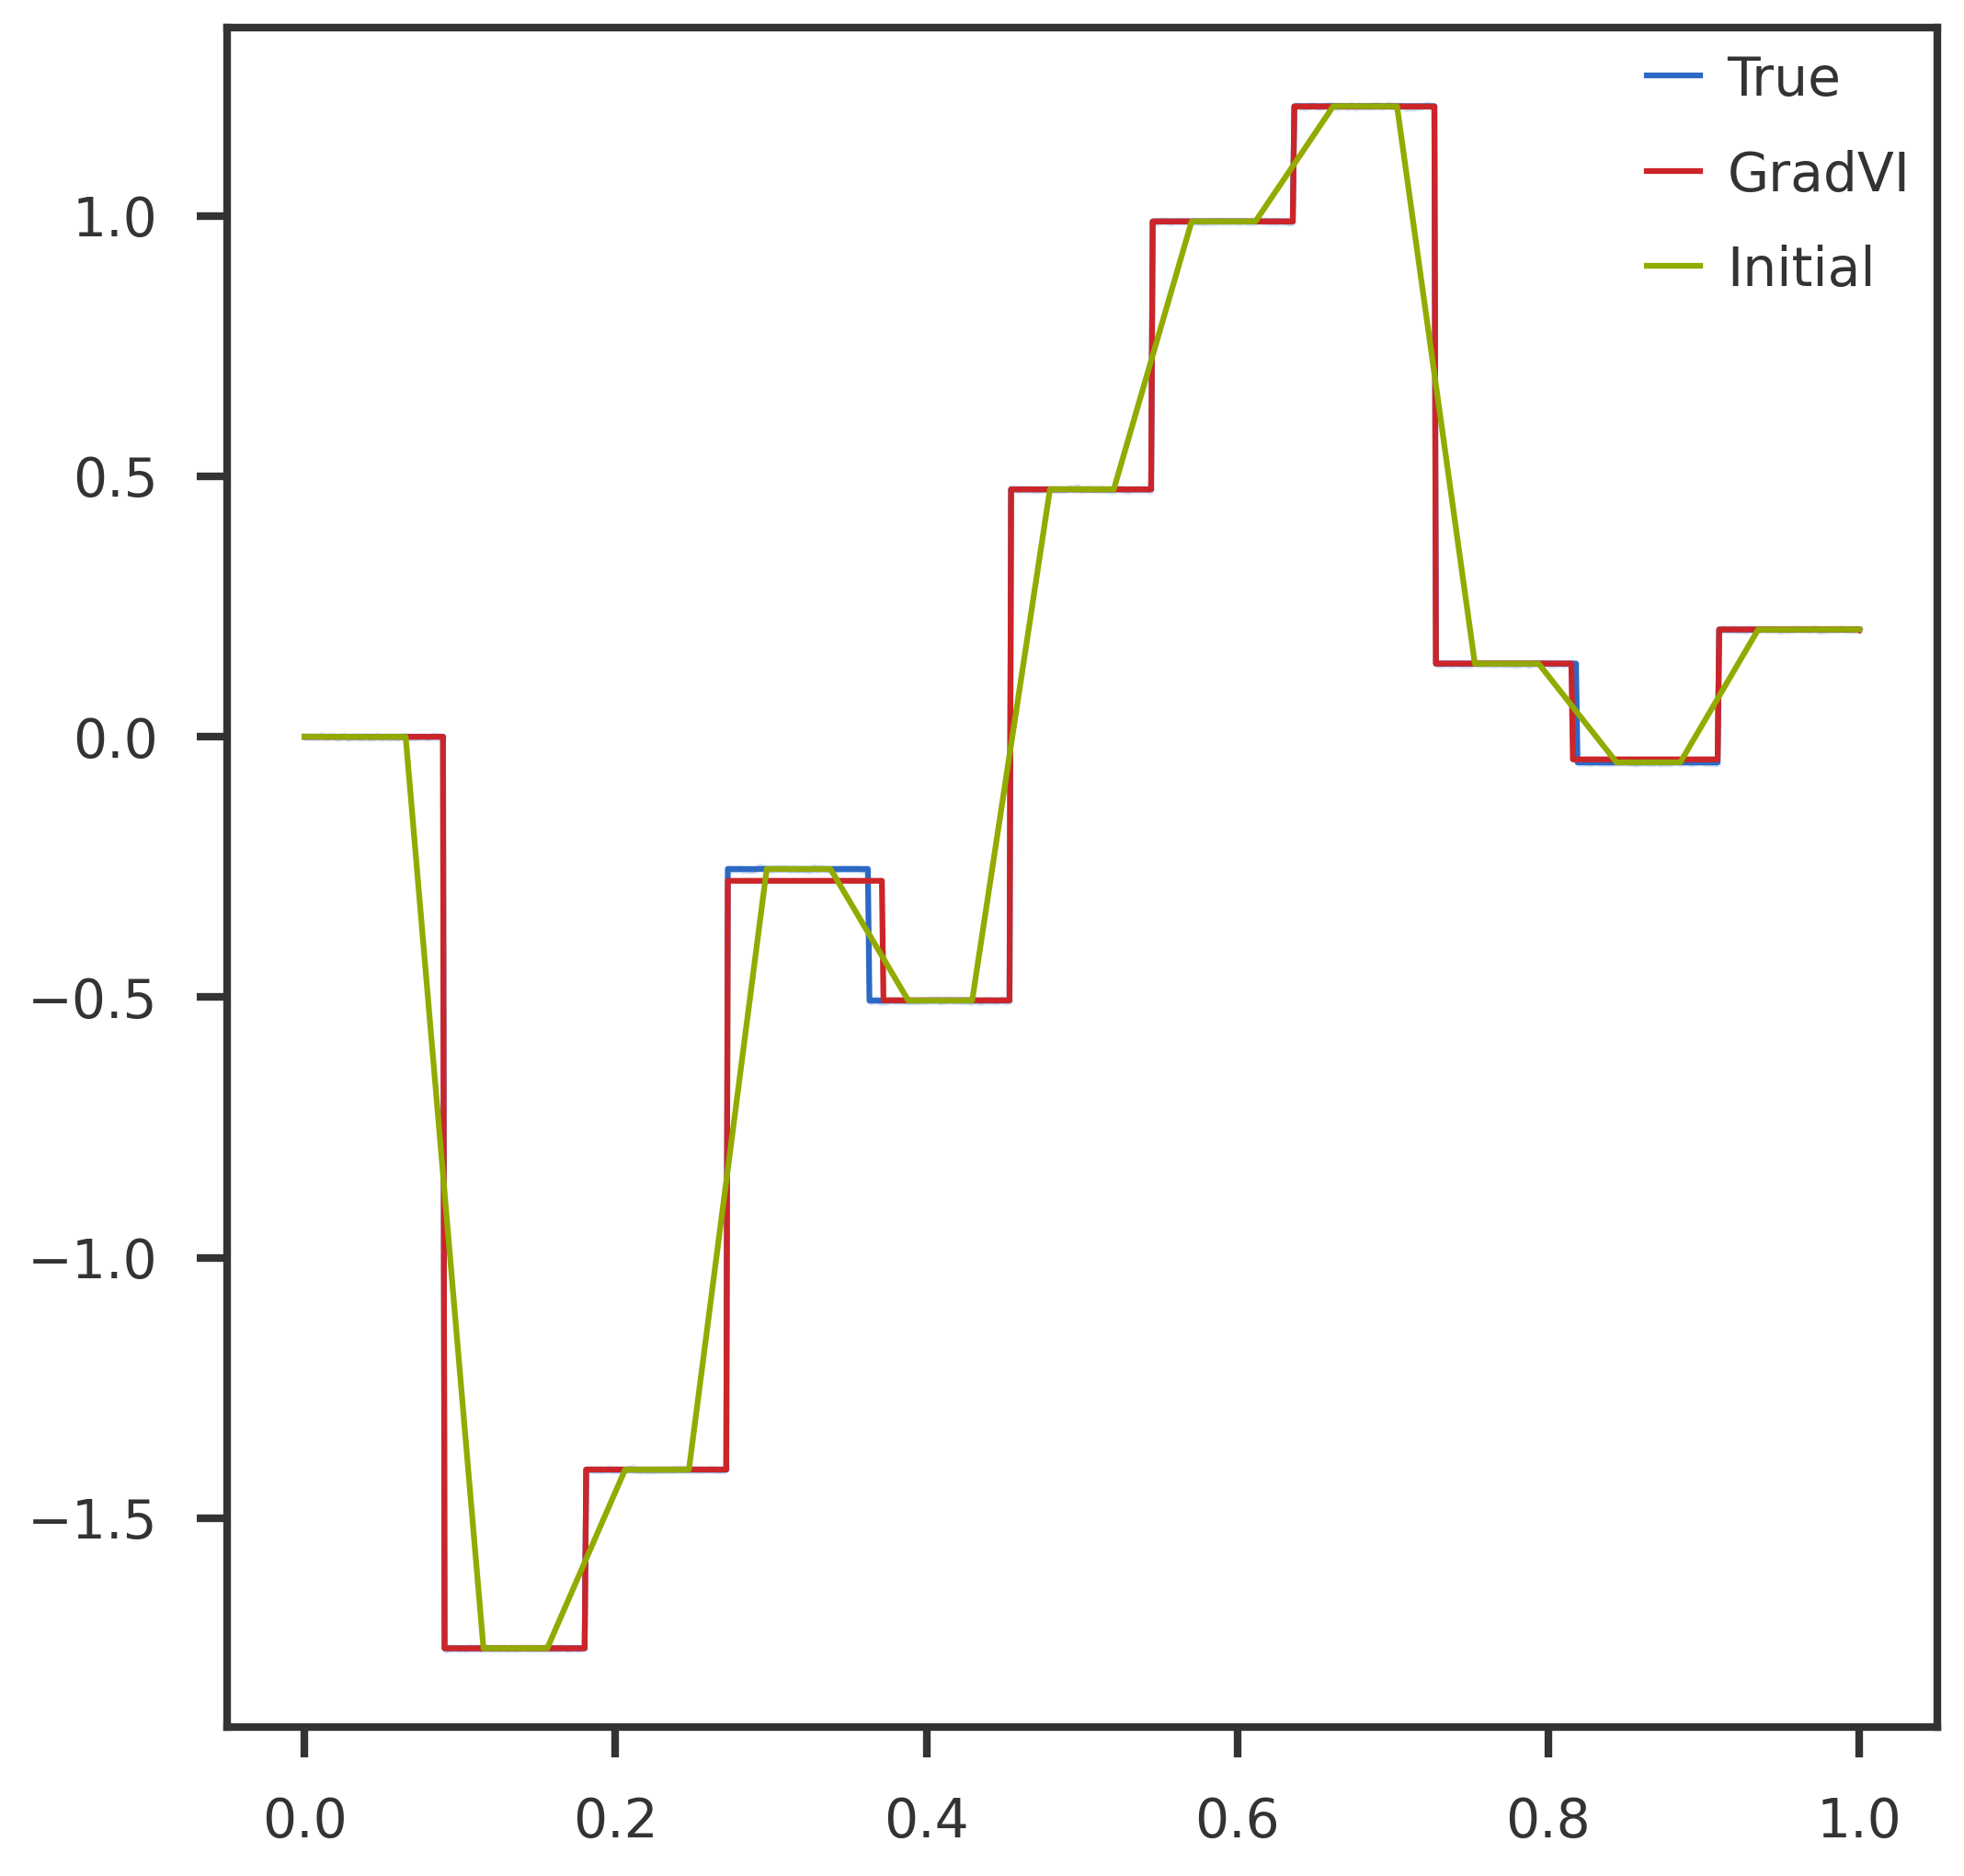

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s = 1, alpha = 0.1)
ax1.plot(x, ytrue, label = "True")
ax1.plot(x, gv.ypred, label = "GradVI")
#ax1.plot(x, ypred, label = "GradVI-ypred")
ax1.plot(x, y_ma, label = "Initial")
ax1.legend()
plt.show()

In [ ]:
from gradvi.models import basis_matrix as gvbm

In [ ]:
Xinv = gvbm.trendfiltering_inverse(n, 2)
Xinv

In [ ]:
y_ma

In [ ]:
def discrete_difference(y, d):
    ynew = y_ma.copy()
    for i in range(d + 1):
        ynew[i+1:] = np.diff(ynew[i:])
    return ynew

In [ ]:
np.dot(Xinv, y_ma)

In [ ]:
discrete_difference(y_ma, 2)

In [ ]:
ynew = y_ma.copy()

In [ ]:
ynew[1:] = np.diff(ynew)

In [ ]:
ynew[2:] = np.diff(ynew[1:])

In [ ]:
ynew[3:] = np.diff(ynew[2:])

In [ ]:
ynew

In [ ]:
for i in range(2):
    print(i)

In [ ]:
np.diff(np.diff(np.diff(y_ma)))[:10]

In [ ]:
np.mean(y_ma)

In [ ]:
X = gvbm.trendfiltering(n, 1)

In [ ]:
np.sum(np.square(X), axis = 0)[2:10]

In [ ]:
np.linspace(n, 1, n).shape

In [ ]:
model, mu, beta, ypred = fit_ash_trendfiltering_gradvi(y, objtype, degree = degree, maxiter = 20000,
                    ncomp = ncomp, sparsity = sparsity, skbase = skbase, skfactor = skfactor,
                    yinit = yinit, s2init = s2init, run_initialize = False, # this is a separate initialization for theta
                    standardize_basis = standardize_basis, scale_basis = scale_basis, standardize = True)


In [ ]:
# H, Hinv, Hscale, Hinvscale, y, ytest, ytrue, beta, snr = \ 
#     simulate.changepoint_from_bspline(
#         x, knots, strue, degree = dtrue,/f
#         signal = signal, include_intercept = False,
#         bfix = bfix, seed = None)